## User reviews

In [1]:
user = pd.read_csv("./crawler/user_review.csv")

In [2]:
print(len(user))
np.where(user.isna())

30898


(array([9082]), array([3]))

In [3]:
user.loc[9082], user.loc[3] # 9082 no commented review, 3... why?

(title     F1 2015
 id        Trefinn
 score           9
 review        NaN
 Name: 9082, dtype: object,
 title                                Monster Jam: Crush It!
 id                                                everchill
 score                                                     1
 review    Terrible waste. One-player only, only 6 venues...
 Name: 3, dtype: object)

In [4]:
user.dropna(how='any', inplace=True)

In [5]:
np.where(user.isna())

(array([], dtype=int64), array([], dtype=int64))

In [6]:
print(len(user)) # what happen to 3?

30897


In [7]:
user.loc[3]

title                                Monster Jam: Crush It!
id                                                everchill
score                                                     1
review    Terrible waste. One-player only, only 6 venues...
Name: 3, dtype: object

In [8]:
user.reset_index(drop=True, inplace=True)

In [9]:
user.review[163] # make problem

"Avoided this game for fear of extreme views and racial baiting dialogue.\rDecided I was being an idiot and had a try.\rEvery fear realised.\rNothing changed much from Watchdogs original.\rPresumably the gameplay isn't what people hated about the original.\rI rather liked Aiden... Not sure I like a single person other than the quiet nerd here."

In [10]:
user.review = user.review.apply(lambda x: x.replace('\r', ' ')) 
user.review = user.review.apply(lambda x: x.replace('\n', ' '))

In [11]:
user.review[163]

"Avoided this game for fear of extreme views and racial baiting dialogue. Decided I was being an idiot and had a try. Every fear realised. Nothing changed much from Watchdogs original. Presumably the gameplay isn't what people hated about the original. I rather liked Aiden... Not sure I like a single person other than the quiet nerd here."

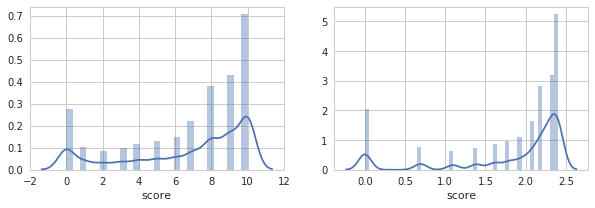

In [12]:
%matplotlib inline
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.distplot((user.score))
plt.subplot(122)
sns.distplot(np.log1p(user.score))
plt.show()

In [13]:
user.to_csv('edited_user.csv', index=False)

---

## critic reviews

In [14]:
critic = pd.read_csv("./crawler/critic_review.csv")

In [15]:
critic.tail()

,title,id,score,review
37339,Injustice 2,Eurogamer Italy,80,\n Injustice 2 ...
37340,Injustice 2,Games Master UK,79,\n An accessibl...
37341,Injustice 2,Video Chums,78,\n Injustice 2 ...
37342,Injustice 2,Digitally Downloaded,70,\n Injustice 2 ...
37343,Injustice 2,Game Revolution,60,\n These fruits...


In [16]:
len(critic)

37344

In [17]:
critic = critic[critic.score !='[]']

critic.reset_index(drop=True, inplace=True)

In [18]:
print(len(critic))
np.where(critic.isna())

35706


(array([], dtype=int64), array([], dtype=int64))

In [19]:
critic.review[-1:].values

array(['\n                                These fruits are soured by lazy, contrived storytelling, and a gear system that stands in opposition to what fighting games should be about. All of this ultimately makes Injustice 2 a step back not only from the original but also from the level of quality we’re used to seeing from NetherRealm.\n                            '],
      dtype=object)

In [20]:
critic.review = critic.review.apply(lambda x: x[33:-30])

In [21]:
critic.review[-1:].values

array(['These fruits are soured by lazy, contrived storytelling, and a gear system that stands in opposition to what fighting games should be about. All of this ultimately makes Injustice 2 a step back not only from the original but also from the level of quality we’re used to seeing from NetherRealm'],
      dtype=object)

In [22]:
critic.to_csv('edited_critic.csv', index=False)

---

## edit for recommand system

In [31]:
user = pd.read_csv("edited_user.csv")
critic = pd.read_csv("edited_critic.csv")

In [32]:
len(user), len(critic)

(30897, 35706)

In [33]:
rating_critic = critic[['title', 'id', 'score']]
rating_user = user[['title', 'id', 'score']]

In [34]:
rating_critic['score'] = rating_critic['score'].apply(lambda x: x/10)

/home/mk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
rating = rating_critic.append(rating_user).reset_index(drop=True)

In [36]:
from sklearn.preprocessing import LabelEncoder

title_ = LabelEncoder()
rating['title'] = title_.fit_transform(rating['title'])
rating_critic['title'] = title_.transform(rating_critic['title'])
rating_user['title'] = title_.transform(rating_user['title'])

/home/mk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
id_ = LabelEncoder()
rating['id'] = id_.fit_transform(rating['id'])
rating_user['id'] = id_.transform(rating_user['id'])
rating_critic['id'] = id_.transform(rating_critic['id'])

/home/mk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [40]:
rating.to_csv('rating.csv', index=False)
rating_user.to_csv('rating_user.csv', index=False)
rating_critic.to_csv('rating_critic.csv', index=False)